In [1]:
import pandas as pd 
import mysql.connector
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='ecommerse'
)

cur = db.cursor()

# Basic Quiries

In [3]:
# 1. List all unique cities where customers are located.


query = """  select distinct customer_city from customers   """

cur.execute(query)

data = cur.fetchall()

len(data)
data




[('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

In [17]:
# 5. Count the number of customers from each state. 


query = """  SELECT customers.customer_state as State , count(customers.customer_id) FROM customers
GROUP BY State  ;   """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data, columns=["State", "Customer_count"]  )
df = df.sort_values(by="Customer_count", ascending=False)


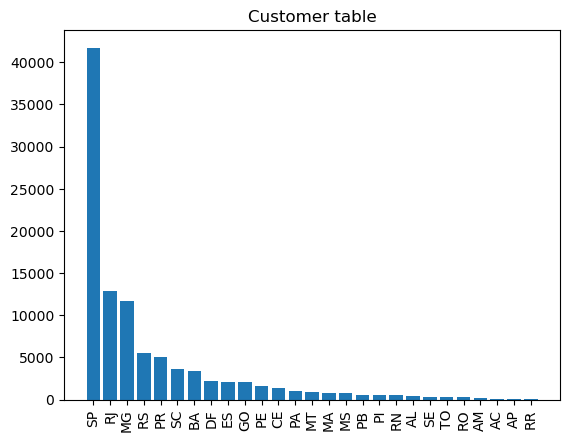

In [18]:
plt.bar(df["State"], df["Customer_count"])
plt.title("Customer table")
plt.xticks(rotation = 90)
plt.show()

In [35]:

# 1. Calculate the number of orders per month in 2018.



query = """  SELECT monthname(orders.order_purchase_timestamp) as Month, count( orders.order_id ) NO_Orders
 from orders GROUP BY Month ORDER BY monthname(orders.order_purchase_timestamp) ;   """

cur.execute(query)

data = cur.fetchall()

df = pd.DataFrame(data, columns=["Months", "Order_Count"] )

df = df.sort_values(by="Order_Count")


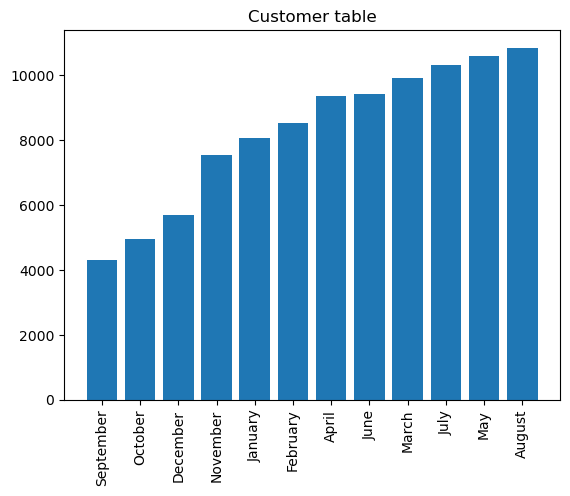

In [36]:
plt.bar(df["Months"], df["Order_Count"])
plt.title("Customer table")
plt.xticks(rotation = 90)
plt.show()

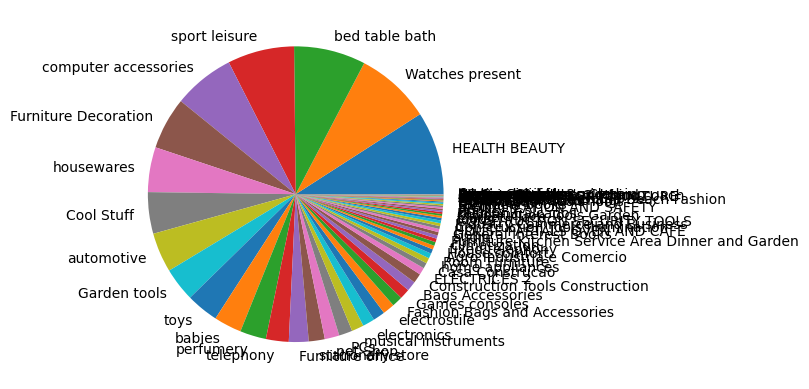

In [45]:
#  3. Calculate the percentage of total revenue contributed by each product category.



query = """  SELECT 
    products.product_category AS category,
    ROUND(SUM(order_items.price + order_items.freight_value) / (SELECT 
                    ROUND(SUM(price + freight_value), 2)
                FROM
                    order_items) * 100.0,
            2) AS Percent
FROM
    products
        JOIN
    order_items ON products.product_id = order_items.product_id
GROUP BY category
ORDER BY Percent DESC;   """

cur.execute(query)

data = cur.fetchall()

data

df = pd.DataFrame(data, columns=["Category", "Percent"] )
df

plt.pie(df["Percent"] , labels = df["Category"])
plt.show()

In [52]:
# 5. Calculate the total revenue generated by each seller, and rank them by revenue.



query = """ select seller.seller_id as Seller , round(sum(order_items.price),2 ) as Revenue
from seller join order_items 
on seller.seller_id = order_items.seller_id 
group by Seller
order by Revenue Desc
LIMIT 10
;    """

cur.execute(query)

data = cur.fetchall()

data
df = pd.DataFrame(data, columns=["Seller", "Revenue" ] )


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '4869f7a5dfa277a7dca6462dcf3b52b2'),
  Text(1, 0, '53243585a1d6dc2643021fd1853d8905'),
  Text(2, 0, '4a3ca9315b744ce9f8e9374361493884'),
  Text(3, 0, 'fa1c13f2614d7b5c4749cbc52fecda94'),
  Text(4, 0, '7c67e1448b00f6e969d365cea6b010ab'),
  Text(5, 0, '7e93a43ef30c4f03f38b393420bc753a'),
  Text(6, 0, 'da8622b14eb17ae2831f4ac5b9dab84a'),
  Text(7, 0, '7a67c85e85bb2ce8582c35f2203ad736'),
  Text(8, 0, '1025f0e2d44d7041d6cf58b6550e0bfa'),
  Text(9, 0, '955fee9216a65b617aa5c0531780ce60')])

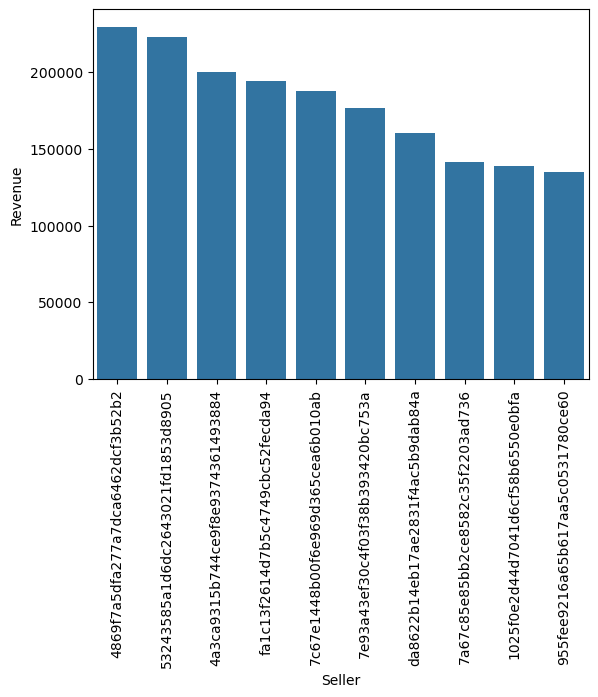

In [55]:
sns.barplot( x = "Seller", y = "Revenue", data=df)
plt.xticks(rotation=90)

# Advanced Queries


In [56]:
# 3. Calculate the year-over-year growth rate of total sales.


query = """ SELECT year(orders.order_purchase_timestamp) as Years , round(sum(order_items.price),2) as Revenue ,
sum(round(sum(order_items.price)) ) OVER( order BY year(orders.order_purchase_timestamp) ) as Cumu
FROM orders JOIN order_items
on orders.order_id = order_items.order_id 
GROUP BY Years
ORDER BY Years
;    """

cur.execute(query)

data = cur.fetchall()

data





[(2016, 49785.92, 49786.0),
 (2017, 6155806.98, 6205593.0),
 (2018, 7386050.8, 13591644.0)]